# Important Libraries:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The entire Bethe-Heitler amplitude squared: $$|T_{BH}^{2}| = \frac{e^{6}}{x_{B}^{2} y^{2} (1 + \varepsilon^{2})^{2} \Delta^{2} P_{1}(\phi) P_{2}(\phi)} (c_{0}^{BH} + \sum_{n = 1}^{2} c_{n}^{BH} cos(n \phi) + s_{1}^{BH} sin(\phi))$$

# Important Constants:

In [136]:
_ELECTROMAGNETIC_FINE_STRUCTURE_CONSTANT = (1. / 137.0359998)
_ELECTROMAGNETIC_FINE_STRUCTURE_CONSTANT_INVERSE = 0.0072973525693
_PI_DECIMAL = 3.141592653589793238462643383279502884197
_PI_RADIANS = _PI_DECIMAL / 180.
_MASS_OF_PROTON_IN_GEV = .93827208816
_MASS_OF_PROTON_SQUARED_IN_GEV_SQUARED = _MASS_OF_PROTON_IN_GEV *_MASS_OF_PROTON_IN_GEV
_CONVERT_GEV_TO_NANOBARNS_FACTOR = .389379 * 1000000.
_EXPERIMENTALLY_DETERMINED_CONSTANT_IN_ELECTRIC_FORM_FACTOR = 0.710649
_PROTON_MAGNETIC_MOMENT = 2.79284734463

## $\varepsilon = \frac{2 x_{B} m_{p}}{Q}$:

In [137]:
def calculate_kinematics_epsilon(
        squared_Q_momentum_transfer: float, 
        x_Bjorken: float, 
        verbose = True) -> float:
    """
    Description
    --------------
    Calculate epsilon, which is just a ratio of kinematic quantities:
    \epsilon := 2 * m_{p} * x_{B} / Q

    Parameters
    --------------
    squared_Q_momentum_transfer: (float)
        kinematic momentum transfer to the hadron. 

    x_Bjorken: (float)
        kinematic Bjorken X

    verbose: (bool)
        Debugging console output.
    

    Notes
    --------------
    """
    if verbose:
        print(f"> Received mp (mass of proton): {_MASS_OF_PROTON_IN_GEV}")
        print(f"> Received xB (Bjorken x): {x_Bjorken}")
        print(f"> Received Q^2  (squared momentum transfer): {squared_Q_momentum_transfer}")
        print(f"> Calculated Q with NumPy as: {np.sqrt(squared_Q_momentum_transfer)}")
            
    try:

        # (1): Calculate Epsilon right away:
        epsilon = (2. * x_Bjorken * _MASS_OF_PROTON_IN_GEV) / np.sqrt(squared_Q_momentum_transfer)

        if verbose:
            print(f"> Calculated epsilon to be: {epsilon}")

        # (2): Return Epsilon:
        return epsilon
    
    except Exception as E:
        print(f"> Error in computing kinematic epsilon:\n> {E}")
        return None

## $\varepsilon^{2} = \frac{4 x_{B}^{2} m_{p}^{2}}{Q^{2}}$:

In [138]:
def calculate_kinematics_epsilon_squared(
        squared_Q_momentum_transfer: float, 
        x_Bjorken: float, 
        verbose = True) -> float:
    """
    Description
    --------------
    Calculate epsilon, which is just a ratio of kinematic quantities:
    \epsilon^{2} := 4 * m_{p}^{2} * x_{B}^{2} / Q^{2}

    Parameters
    --------------
    squared_Q_momentum_transfer: (float)
        kinematic momentum transfer to the hadron. REALLY IMPORTANT
        THAT IT'S THE SQUARE OR MOMENTUM TRANSFER.

    x_Bjorken: (float)
        kinematic Bjorken X

    verbose: (bool)
        Debugging console output.
    

    Notes
    --------------
    """
    try:
        epsilon_squared = (4. * _MASS_OF_PROTON_IN_GEV**2 * x_Bjorken**2) / squared_Q_momentum_transfer

        if verbose:
            print(f"> Received mp (mass of proton): {_MASS_OF_PROTON_IN_GEV}")
            print(f"> Received xB (Bjorken x): {x_Bjorken}")
            print(f"> Received Q  (momentum transfer): {squared_Q_momentum_transfer}")
            print(f"> Calculated epsilon squared to be: {epsilon_squared}")

        return epsilon_squared
    
    except Exception as E:
        print(f"> Error in computing kinematic epsilon:\n> {E}")
        return None

## y = $\frac{p_{1} \cdot q_{1}}{p_{1} \cdot k} = \frac{Q}{\epsilon k}$

In [139]:
def calculate_kinematics_lepton_energy_fraction_y(
        epsilon: float, 
        squared_Q_momentum_transfer: float, 
        lab_kinematics_k: float, 
        verbose = True) -> float:
    """
    Description
    --------------
    Calculate y, which measures the leptopn energy fraction.
    y^{2} := \frac{ \sqrt{Q^{2}} }{ \sqrt{\epsilon^{2}} k }

    Parameters
    --------------
    epsilon: (float)
        derived kinematics

    squared_Q_momentum_transfer: (float)
        Q^{2} momentum transfer to the hadron

    lab_kinematics_k: (float)
        lepton momentum loss

    verbose: (bool)
        Debugging console output.

    Notes
    --------------

    """
    try:
        lepton_energy_fraction_y = np.sqrt(squared_Q_momentum_transfer) / (epsilon * lab_kinematics_k)

        if verbose:
            print(f"> Calculated y to be: {lepton_energy_fraction_y}")

        return lepton_energy_fraction_y
    
    except Exception as E:
        print(f"> Error in computing lepton_energy_fraction_y:\n> {E}")
        return None

## $\xi = x_{B} (\frac{1 + \frac{t}{2 Q^{2}}}{2 - x_{B} + \frac{x_{B} t }{Q^{2}}})$

In [140]:
def calculate_kinematics_skewness_parameter(
        squared_Q_momentum_transfer: float, 
        x_Bjorken: float, 
        hadronic_four_momentum_change_t_delta_squared: float, 
        verbose = False) -> float:
    """
    Description
    --------------
    Calculate the Skewness Parameter
    x_{i} = x_{B} * (1 + \frac{ t Q^{2} }{ 2 } ) ... FUCK YOU

    Parameters
    --------------
    squared_Q_momentum_transfer: (float)
        kinematic momentum transfer to the hadron

    x_Bjorken: (float)
        kinematic Bjorken X

    verbose: (bool)
        Debugging console output.
    

    Notes
    --------------
    """
    try:

        # (1): The Numerator:
        numerator = (1. + (hadronic_four_momentum_change_t_delta_squared / (2. * squared_Q_momentum_transfer)))

        # (2): The Denominator:
        denominator = (2. - x_Bjorken + (x_Bjorken * hadronic_four_momentum_change_t_delta_squared / squared_Q_momentum_transfer))

        # (3): Calculate the Skewness Parameter:
        skewness_parameter = x_Bjorken * numerator / denominator

        if verbose:
            print(f"> Received Q (momentum transfer): {squared_Q_momentum_transfer}")
            print(f"> Received x_B (Bjorken x) {x_Bjorken}")
            print(f"> Received t (hadronic momentum change): {hadronic_four_momentum_change_t_delta_squared}")
            print(f"> Calculated generalized Bjorken to be: {skewness_parameter}")

        return skewness_parameter
    
    except Exception as E:
        print(f"> Error in computing kinematic generalized Bjorken x:\n> {E}")
        return None

## $t_{0} = - \frac{4 \xi^{2} m_{p}^{2}}{1 - \xi^{2}}$

In [141]:
def calculate_kinematics_minimum_t(
        skewness_parameter: float, 
        verbose = False) -> float:
    """
    Description
    --------------
    Calculate the minimum value of t:
    (Expression is causing issues in cell evaluation. Will fill in later.)

    Parameters
    --------------
    skewness_parameter: (float)
        skewness parameter

    Returns
    --------------
    t_minimum: (float)
        minimum t

    Notes
    --------------
    """
    try:

        # (1): Calculate the Numerator:
        numerator = 4. * skewness_parameter**2 * _MASS_OF_PROTON_IN_GEV**2

        # (2): Calculate the Denominator:
        denominator = 1 - (skewness_parameter**2)

        # (3): Obtain the t minimum
        t_minimum = (-1.) * numerator / denominator

        if verbose:
            print(f"> Received mass of proton: {_MASS_OF_PROTON_IN_GEV}")
            print(f"> Received xi (skewness): {skewness_parameter}")
            print(f"> Calculated the minimum value of t to be: {t_minimum}")

        return t_minimum

    except Exception as E:
        print(f"> Error calculating minimum t:\n> {E}")
        return None

## Prefactor: $\frac{\alpha^{3} x_{B} y}{16 \pi^{2} Q^{2} \sqrt{1 + \epsilon^{2}}}$

In [142]:
def calculate_cross_section_prefactor(
        epsilon: float, 
        squared_Q_momentum_transfer: float, 
        x_Bjorken: float, 
        lepton_energy_fraction_y: float, 
        verbose = True):
    """
    Description
    --------------

    Parameters
    --------------
    epsilon: (float)

    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    lepton_energy_fraction_y: (float)

    verbose: (bool)
        Debugging console output.


    Notes
    --------------
    (1): 
    """

    try:

        # (1): Calculate the numerator of the prefactor
        numerator = _ELECTROMAGNETIC_FINE_STRUCTURE_CONSTANT**3 * x_Bjorken * lepton_energy_fraction_y

        # (2): Calculate the denominator of the prefactor:
        denominator = 16. * np.pi**2 * squared_Q_momentum_transfer * np.sqrt(1 + epsilon**2)

        # (3): Construct the prefactor:
        prefactor = numerator / denominator

        if verbose:
            print(f"> Calculated cross-section prefactor to be: {prefactor}")

        # (4): Return the prefactor:
        return prefactor

    except Exception as E:
        print(f"> Error calculating cross section prefactor:\n> {E}")
        return None

## $K^{2}$

In [143]:
def calculate_kinematics_k_squared(
        epsilon: float, 
        squared_Q_momentum_transfer: float, 
        x_Bjorken: float, 
        lepton_energy_fraction_y: float,
        squared_hadronic_momentum_transfer_t: float,
        squared_hadronic_momentum_transfer_t_minimum: float,
        verbose = True) -> float:
    """
    Description
    --------------
    Equation (30) in the BKM Formalism, available
    at this link: https://arxiv.org/pdf/hep-ph/0112108.pdf

    Parameters
    --------------
    epsilon: (float)

    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    lepton_energy_fraction_y: (float)

    squared_hadronic_momentum_transfer_t: (float)

    squared_hadronic_momentum_transfer_t_minimum: (float)

    verbose: (bool)
        Debugging console output.

    Returns
    --------------
    k_squared : (float)
        result of the operation
    
    Notes
    --------------
    (1): k-dot-delta shows up in computing the lepton
        propagators. We need to get K^{2} first. It is Eq. (29) 
        in the following paper: https://arxiv.org/pdf/hep-ph/0112108.pdf
    """
    
    try:

        # (1): Calculate recurring quantity 1 - xB -- this IS multiplicative quantity one!
        one_minus_x_bjorken = 1 - x_Bjorken

        # (2): Multiplicative Quantity Two:
        second_multiplicative_quantity = 1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.)

        # (3): Multiplicative Quantity Three:
        third_multiplicative_quantity = 1. - (squared_hadronic_momentum_transfer_t_minimum / squared_hadronic_momentum_transfer_t)

        # (3): Multiplicative Quantity Four - First Term:
        fourth_multiplicative_quantity_first_term = np.sqrt(1 + epsilon**2)

        # (4): Multiplicative Quantity Four - Second Term - Numerator:
        fourth_multiplicative_quantity_second_term_numerator = 4. * x_Bjorken * one_minus_x_bjorken + epsilon**2

        # (5): Multiplicative Quantity Four - Second Term - Denominator:
        fourth_multiplicative_quantity_second_term_denominator = 4. * one_minus_x_bjorken

        # (6): Multiplicative Quantity Four - Prefactor:
        fourth_multiplicative_quantity_second_term_prefactor = ((squared_hadronic_momentum_transfer_t - squared_hadronic_momentum_transfer_t_minimum ) / squared_Q_momentum_transfer)

        # (7): Multiplicative Quantity Four:
        fourth_multiplicative_quantity_second_term = fourth_multiplicative_quantity_second_term_prefactor* fourth_multiplicative_quantity_second_term_numerator / fourth_multiplicative_quantity_second_term_denominator

        # (8): Multiplicative Quantity Four in Whole:
        fourth_multiplicative_quantity = fourth_multiplicative_quantity_first_term + fourth_multiplicative_quantity_second_term

        # (9): Calculate the prefactor of the entire thing:
        k_squared_prefactor = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer
    
        # (9): Calculate the final quantity: K^{2}
        k_squared = -1. * k_squared_prefactor * one_minus_x_bjorken * second_multiplicative_quantity * third_multiplicative_quantity * fourth_multiplicative_quantity

        if verbose:
            print(f"> Calculated k_squared to be: {k_squared}")

        # (10) Return K^{2}:
        return k_squared

    except Exception as E:
        print(f"> Error in calculating K^2\n> {E}")
        return None

## $k \cdot \Delta = - \frac{Q^{2}}{2 y (1 + \epsilon^{2})} (1 + 2 K cos(\phi) - \frac{\Delta^{2}}{Q^{2}}( 1 - x_{B} (2 - y) + \frac{y \epsilon^{2}}{2}) + \frac{y \epsilon^{2}}{2})$

In [144]:
def calculate_k_dot_delta(
        kinematic_k: float,
        epsilon: float, 
        squared_Q_momentum_transfer: float, 
        x_Bjorken: float, 
        lepton_energy_fraction_y: float,
        squared_hadronic_momentum_transfer_t: float,
        azimuthal_phi: float,
        verbose = True):
    """
    Description
    --------------
    Equation (29) in the BKM Formalism, available
    at this link: https://arxiv.org/pdf/hep-ph/0112108.pdf

    Parameters
    --------------
    kinematic_k: (float)
    
    epsilon: (float)

    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    lepton_energy_fraction_y: (float)

    squared_hadronic_momentum_transfer_t: (float)

    azimuthal_phi: (float)

    verbose: (bool)
        Debugging console output.

    Returns
    --------------
    k_dot_delta_result : (float)
        result of the operation
    
    Notes
    --------------
    (1): k-dot-delta shows up in computing the lepton
        propagators. It is Eq. (29) in the following
        paper: https://arxiv.org/pdf/hep-ph/0112108.pdf
    """

    try:
    
        # (1): The prefactor: \frac{Q^{2}}{2 y (1 + \varepsilon^{2})}
        prefactor = squared_Q_momentum_transfer / (2. * lepton_energy_fraction_y * (1. + epsilon**2))

        # (2): Second term in parentheses: Phi-Dependent Term: 2 K cos(\phi)
        phi_dependence = 2. * kinematic_k * np.cos(azimuthal_phi)

        # (3): Prefactor of third term in parentheses: \frac{t}{Q^{2}}
        ratio_delta_to_q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (4): Second term in the third term's parentheses: x_{B} (2 - y)
        bjorken_scaling = x_Bjorken * (2. - lepton_energy_fraction_y)

        # (5): Third term in the third term's parentheses: \frac{y \varepsilon^{2}}{2}
        ratio_y_epsilon = lepton_energy_fraction_y * epsilon**2 / 2.

        # (6): Adding up all the "correction" pieces to the prefactor, written as (1 + correction)
        correction = phi_dependence - (ratio_delta_to_q_squared * (1. - bjorken_scaling + ratio_y_epsilon)) + (lepton_energy_fraction_y * epsilon**2 / 2.)

        # (7): Writing it explicitly as "1 + correction"
        in_parentheses = 1. + correction

        # (8): The actual equation:
        k_dot_delta_result = -1. * prefactor * in_parentheses

        if verbose:
            print(f"> Calculated k dot delta: {k_dot_delta_result}")

        # (9): Return the number:
        return k_dot_delta_result
    
    except Exception as E:
        print(f"> Error in calculating k.Delta:\n> {E}")
        return None

## $P_{1}(\phi) = 1 + 2 \frac{k\cdot \Delta}{Q^{2}}$

In [145]:
def calculate_lepton_propagator_p1(
        k_dot_delta: float,
        squared_Q_momentum_transfer: float, 
        verbose = False
        ):
    """
    Description
    --------------
    Equation (28) [first equation] divided through by
    Q^{2} according to the following paper:
    https://arxiv.org/pdf/hep-ph/0112108.pdf

    Parameters
    --------------
    k_dot_delta: (float)

    squared_Q_momentum_transfer: (float)

    verbose: (bool)
        Debugging console output.

    Notes
    --------------
    """
    try:
        p1_propagator = 1. + (2. * (k_dot_delta / squared_Q_momentum_transfer))
        
        if verbose:
            print(f"> Computed the P1 propagator to be: {p1_propagator}")

        return p1_propagator
    
    except Exception as E:
        print(f"> Error in computing p1 propagator:\n> {E}")
        return None

## $P_{2}(\phi) = \frac{-2 k \cdot \Delta}{Q^{2}}+ \frac{t}{Q^{2}}$

In [146]:
def calculate_lepton_propagator_p2(
        k_dot_delta: float,
        squared_Q_momentum_transfer: float, 
        squared_hadronic_momentum_transfer_t: float,
        verbose = False
    ):
    """
    Description
    --------------
    Equation (28) [second equation] divided through by
    Q^{2} according to the following paper:
    https://arxiv.org/pdf/hep-ph/0112108.pdf

    Parameters
    --------------
    k_dot_delta: (float)

    squared_Q_momentum_transfer: (float)

    verbose: (bool)
        Debugging console output.

    Notes
    --------------
    """
    try:
        p2_propagator = (-2. * (k_dot_delta / squared_Q_momentum_transfer)) + (squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer)
        
        if verbose:
            print(f"> Computed the P2 propagator to be: {p2_propagator}")

        return p2_propagator
    
    except Exception as E:
        print(f"> Error in computing p2 propagator:\n> {E}")
        return None

## $c^{(0)}_{BH}$: First Coefficient

In [170]:
def calculate_fourier_coefficients_unpolarized_BH_0(
        k_shorthand_squared: float, 
        epsilon: float, 
        Q_momentum_transfer: float, 
        x_Bjorken: float, 
        squared_hadronic_momentum_transfer_t: float, 
        lepton_energy_fraction_y: float, 
        Dirac_form_factor_F1: float, 
        Pauli_form_factor_F2: float, 
        verbose = True):
    """
    Description
    --------------
    Equation (35) of the BH02 Formalism.

    Parameters
    --------------
    k_shorthand_squared: (float)
    
    epsilon: (float)

    Q_momentum_transfer: (float)

    x_Bjorken: (float)

    squared_hadronic_momentum_transfer_t: (float)

    lepton_energy_fraction_y: (float)

    Dirac_form_factor_F1: (float)

    Pauli_form_factor_F2: (float)

    verbose: (bool)
        Debugging console output.

    Notes
    --------------
    (1): This coefficient is in Equation (35) from
        this paper:
        https://arxiv.org/pdf/hep-ph/0112108.pdf
    """
    try:

        # (1): Calculate the common appearance of F1 + F2:
        addition_of_form_factors_squared = (Dirac_form_factor_F1 + Pauli_form_factor_F2)**2

        # (2): Calculate the common appearance of a weighted sum of F1 and F2:
        weighted_combination_of_form_factors = Dirac_form_factor_F1**2 - ((squared_hadronic_momentum_transfer_t / (4. * _MASS_OF_PROTON_IN_GEV**2)) * Pauli_form_factor_F2**2)

        # (3): Calculate the common appearance of delta^{2} / Q^{2} = t / Q^{2}
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / Q_momentum_transfer**2
        
        # (4):  The first line that contributes to c^{(0)}_{BH}:
        first_line = 8. * k_shorthand_squared * ( (2. + 3. * epsilon**2) * (Q_momentum_transfer**2 / squared_hadronic_momentum_transfer_t) * weighted_combination_of_form_factors + 2. * x_Bjorken**2 * addition_of_form_factors_squared)

        # (5): The first part of the second line:
        second_line_first_part = (2. + epsilon**2) * ( (4. * x_Bjorken**2 * _MASS_OF_PROTON_IN_GEV**2 / squared_hadronic_momentum_transfer_t) * (1. + t_over_Q_squared)**2 + 4. * (1 - x_Bjorken) * (1. + (x_Bjorken * t_over_Q_squared) )) * weighted_combination_of_form_factors
        
        # (6): The second part of the second line:
        second_line_second_part = 4. * x_Bjorken**2 * (x_Bjorken + (1. - x_Bjorken + (epsilon**2 / 4.)) * (1 - t_over_Q_squared)**2 - x_Bjorken * (1. - 2. * x_Bjorken) * t_over_Q_squared**2) * addition_of_form_factors_squared

        # (7): The second line in its entirety, which is just a prefactor times the addition of the two parts calculated earlier:
        second_line = (2. - lepton_energy_fraction_y)**2 * (second_line_first_part + second_line_second_part)

        # (8): The third line:
        third_line = 8. * (1. + epsilon**2) * (1. - lepton_energy_fraction_y - (epsilon**2 * lepton_energy_fraction_y**2 / 4.)) * (2. * epsilon**2* (1 - (squared_hadronic_momentum_transfer_t / (4. * _MASS_OF_PROTON_IN_GEV**2)) * weighted_combination_of_form_factors) - x_Bjorken**2 * (1 - t_over_Q_squared)**2 * addition_of_form_factors_squared)

        # (9): Add everything up to obtain the first coefficient:
        c0_unpolarized_BH = first_line + second_line + third_line

        if verbose:
            print(f"> Calculated c0_unpolarized_BH to be: {c0_unpolarized_BH}")

        return c0_unpolarized_BH
    
    except Exception as E:
        print(f"> Error in computing c0_unpolarized_BH:\n> {E}")
        return None



## $c^{(1)}_{BH}$: Second Coefficient

In [169]:
def calculate_fourier_coefficients_unpolarized_BH_1(
        k_shorthand_squared: float, 
        epsilon: float, 
        Q_momentum_transfer: float, 
        x_Bjorken: float, 
        squared_hadronic_momentum_transfer_t: float, 
        lepton_energy_fraction_y: float, 
        Dirac_form_factor_F1: float, 
        Pauli_form_factor_F2: float, 
        verbose = True):
    """
    Description
    --------------
    Equation (36) of the BH02 Formalism. It's bullshit

    Parameters
    --------------
    k_shorthand_squared: (float)
    
    epsilon: (float)

    Q_momentum_transfer: (float)

    x_Bjorken: (float)

    squared_hadronic_momentum_transfer_t: (float)

    lepton_energy_fraction_y: (float)

    Dirac_form_factor_F1: (float)

    Pauli_form_factor_F2: (float)

    verbose: (bool)
        Debugging console output.

    Notes
    --------------
    """
    try:

        # (1): Calculate the common appearance of F1 + F2:
        addition_of_form_factors_squared = (Dirac_form_factor_F1 + Pauli_form_factor_F2)**2

        # (2): Calculate the common appearance of a weighted sum of F1 and F2:
        weighted_combination_of_form_factors = Dirac_form_factor_F1**2 - ((squared_hadronic_momentum_transfer_t/ (4. * _MASS_OF_PROTON_IN_GEV**2)) * Pauli_form_factor_F2**2)
        
        # (3):  The first part of the first line:
        first_line_first_part = ((4. * x_Bjorken**2 * _MASS_OF_PROTON_IN_GEV**2 / squared_hadronic_momentum_transfer_t) - 2. * x_Bjorken - epsilon**2) * weighted_combination_of_form_factors
        
        # (4): The first part of the second line:
        first_line_second_part = 2. * x_Bjorken**2 * (1 - (1 - 2. * x_Bjorken) * (squared_hadronic_momentum_transfer_t / Q_momentum_transfer**2)) * addition_of_form_factors_squared

        # (5): Multiply by the prefactor to obtain c^{(1)}_{BH}
        c1_unpolarized_BH = 8. * np.sqrt(k_shorthand_squared) * (2 - lepton_energy_fraction_y) * (first_line_first_part + first_line_second_part)
        
        if verbose:
            print(f"> Calculated c1_unpolarized_BH to be: {c1_unpolarized_BH}")

        return c1_unpolarized_BH
    
    except Exception as E:
        print(f"> Error in computing c1_unpolarized_BH:\n> {E}")
        return None

## $c^{(2)}_{BH}$: Third Coefficient

In [168]:
def calculate_fourier_coefficients_unpolarized_BH_2(
        k_shorthand_squared, 
        x_Bjorken, 
        squared_hadronic_momentum_transfer_t, 
        Dirac_form_factor_F1, 
        Pauli_form_factor_F2, 
        verbose = True):
    """
    Description
    --------------
    Equation (37) of the BH02 Formalism.

    Parameters
    --------------
    k_shorthand_squared: (float)
    
    epsilon: (float)

    Q_momentum_transfer: (float)

    x_Bjorken: (float)

    squared_hadronic_momentum_transfer_t: (float)

    Dirac_form_factor_F1: (float)

    Pauli_form_factor_F2: (float)

    verbose: (bool)
        Debugging console output.

    Notes
    --------------
    """
    try:

        # (1): Calculate the common appearance of F1 + F2:
        addition_of_form_factors_squared = (Dirac_form_factor_F1 + Pauli_form_factor_F2)**2

        # (2): Calculate the common appearance of a weighted sum of F1 and F2:
        weighted_combination_of_form_factors = Dirac_form_factor_F1**2 - ((squared_hadronic_momentum_transfer_t/ (4. * _MASS_OF_PROTON_IN_GEV**2)) * Pauli_form_factor_F2**2)
        
        # (3): A quick scaling of the weighted sum of F1 and F2:
        first_part_of_contribution = (4. * _MASS_OF_PROTON_IN_GEV**2 / squared_hadronic_momentum_transfer_t) * weighted_combination_of_form_factors
        
        # (4):  Multiply by the prefactor to obtain the coefficient.
        c2_unpolarized_BH = 8. * x_Bjorken**2 * k_shorthand_squared * (first_part_of_contribution + 2 * addition_of_form_factors_squared)
        
        if verbose:
            print(f"> Calculated c2_unpolarized_BH to be: {c2_unpolarized_BH}")

        return c2_unpolarized_BH
    
    except Exception as E:
        print(f"> Error in computing c2_unpolarized_BH:\n> {E}")
        return None



## $F_{GE} = \frac{1}{(1 - \frac{t}{0.71...})^{2}}$:

In [150]:
def calculate_form_factor_electric(
        squared_hadronic_momentum_transfer_t: float,
        verbose = True) -> float:
    """
    Description
    --------------
    The Electric Form Factor is quite mysterious still...
    Where the fuck do these numbers come from?

    Parameters
    --------------
    squared_hadronic_momentum_transfer_t: (float)

    verbose: (bool)
        Debugging console output.

    Returns
    --------------
    form_factor_electric : (float)
        result of the operation
    
    Notes
    --------------
    """
    
    try:
        
        # (1): Calculate the mysterious denominator:
        denominator = 1. - (squared_hadronic_momentum_transfer_t / _EXPERIMENTALLY_DETERMINED_CONSTANT_IN_ELECTRIC_FORM_FACTOR)

        # (2): Calculate the F_{E}:
        form_factor_electric = 1. / (denominator**2)

        if verbose:
            print(f"> Calculated electric form factor as: {form_factor_electric}")

        return form_factor_electric

    except Exception as E:
        print(f"> Error in calculating electric form factor:\n> {E}")
        return None

## $F_{GM} = 2.792847337 F_{GE}$

In [151]:
def calculate_form_factor_magnetic(
        electric_form_factor: float,
        verbose = True) -> float:
    """
    Description
    --------------
    The Magnetic Form Factor is calculated immediately with
    the Electric Form Factor. They are only related by the 
    gyromagnetic ratio.

    Parameters
    --------------
    electric_form_factor: (float)

    verbose: (bool)
        Debugging console output.

    Returns
    --------------
    form_factor_magnetic : (float)
        result of the operation
    
    Notes
    --------------
    """
    
    try:

        # (1): Calculate the F_{M}:
        form_factor_magnetic = _PROTON_MAGNETIC_MOMENT * electric_form_factor

        if verbose:
            print(f"> Calculated magnetic form factor as: {form_factor_magnetic}")

        return form_factor_magnetic

    except Exception as E:
        print(f"> Error in calculating magnetic form factor:\n> {E}")
        return None

## $F_{2} =\frac{G_{M} - G_{E}}{1 - \frac{t}{4 m_{p}^{2}}}$

In [152]:
def calculate_form_factor_pauli_f2(
        squared_hadronic_momentum_transfer_t: float,
        electric_form_factor: float,
        magnetic_form_factor: float,
        verbose = True) -> float:
    """
    Description
    --------------
    We calculate the Pauli form factor, which is just a
    particular linear combination of the electromagnetic
    form factors.

    Parameters
    --------------
    squared_hadronic_momentum_transfer_t: (float)

    electric_form_factor: (float)

    magnetic_form_factor: (float)

    verbose: (bool)
        Debugging console output.

    Returns
    --------------
    pauli_form_factor : (float)
        result of the operation
    
    Notes
    --------------
    """
    
    try:

        # (1): Calculate tau:
        tau = -1. * squared_hadronic_momentum_transfer_t / (4. * _MASS_OF_PROTON_IN_GEV**2)

        # (2): Calculate the numerator:
        numerator = magnetic_form_factor - electric_form_factor

        # (3): Calculate the denominator:
        denominator = 1. + tau
    
        # (4): Calculate the Pauli form factor:
        pauli_form_factor = numerator / denominator

        if verbose:
            print(f"> Calculated Fermi form factor as: {pauli_form_factor}")

        return pauli_form_factor

    except Exception as E:
        print(f"> Error in calculating Fermi form factor:\n> {E}")
        return None

## $F_{1} = G_{M} - F_{2}$

In [153]:
def calculate_form_factor_dirac_f1(
        magnetic_form_factor: float,
        pauli_f2_form_factor: float,
        verbose = True) -> float:
    """
    Description
    --------------
    We calculate the Dirac form factor, which is
    even easier to get than the Fermi one.

    Parameters
    --------------
    magnetic_form_factor: (float)

    pauli_f2_form_factor: (float)

    verbose: (bool)
        Debugging console output.

    Returns
    --------------
    form_factor_magnetic : (float)
        result of the operation
    
    Notes
    --------------
    """
    
    try:
    
        # (1): Calculate the Dirac form factor:
        dirac_form_factor = magnetic_form_factor - pauli_f2_form_factor

        if verbose:
            print(f"> Calculated Dirac form factor as: {dirac_form_factor}")

        return dirac_form_factor

    except Exception as E:
        print(f"> Error in calculating Dirac form factor:\n> {E}")
        return None

In [171]:
def calculate_bethe_heitler_amplitude_squared(
        lab_kinematics_k: float,
        squared_Q_momentum_transfer: float, 
        x_Bjorken: float,
        squared_hadronic_momentum_transfer_t: float,
        azimuthal_phi: float,
        verbose = True):
    """
    Description
    --------------
    We finally put everything together and calculate the Bethe-Heitler
    Amplitude squared. This amplitude contains ten billion different
    contributions that we coded earlier. This amplitude requires 
    essentially every kinematic variable and derived kinematic
    variable, and even needs F1 and F2.

    Parameters
    --------------
    lab_kinematics_k: (float)

    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    squared_hadronic_momentum_transfer_t: (float)

    azimuthal_phi: (float)

    Dirac_form_factor_F1: (float)

    Pauli_form_factor_F2: (float)

    verbose: (bool)
        Debugging console output.

    Function Flow
    --------------
    (1): Calculate the derived kinematic quantities:
        (1.1): Calculate epsilon: needs Q and x_{B}
        (1.2): Calculate epsilon^{2}: needs Q^{2} and x_{B}
        (1.3): Calculate y: needs epsilon, Q^{2}, and ??

    (2): Calculate the cross section prefactor:
    
    (3): Calculate the denominator of the BH amplitude squared:
        (3.1): Calculate the prefactor of the denominator: needs x_{B}, y, epsilon, and t
        (3.2): Calculate the lepton propagators: needs 
    Notes
    --------------
    (1): The equation for the amplitude squared comes from
        Eq. (25) in this paper:
        https://arxiv.org/pdf/hep-ph/0112108.pdf
    """
    if verbose:
        verbose_input = True
    else:
        verbose_input = False
        
    try:

        # (1): Calculate the derived kinematic quantities:

        # (1.1): Calculate Epsilon:
        epsilon = calculate_kinematics_epsilon(
            np.sqrt(squared_Q_momentum_transfer),
            x_Bjorken,
            verbose_input
        )

        # (1.2): Calculate Epsilon Squared:
        epsilon_squared = calculate_kinematics_epsilon_squared(
            squared_Q_momentum_transfer,
            x_Bjorken,
            verbose_input
        )

        # (1.3): Calculate the Lepton Energy Fraction:
        lepton_energy_fraction_y = calculate_kinematics_lepton_energy_fraction_y(
            epsilon,
            squared_Q_momentum_transfer,
            lab_kinematics_k,
            verbose_input
        )

        # (1.4): Calculate the Skewness Parameter:
        skewness_parameter = calculate_kinematics_skewness_parameter(
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            verbose_input
        )

        # (1.5): Calculate t_minimum
        squared_hadronic_momentum_transfer_t_minimum = calculate_kinematics_minimum_t(
            skewness_parameter,
            verbose_input
        )

        # (1.6): Calculate K^{2}:
        k_shorthand_squared = calculate_kinematics_k_squared(
            epsilon,
            squared_Q_momentum_transfer,
            x_Bjorken,
            lepton_energy_fraction_y,
            squared_hadronic_momentum_transfer_t,
            squared_hadronic_momentum_transfer_t_minimum,
            verbose_input
        )

        # (1.7): Calculate k_dot_delta:
        k_dot_delta = calculate_k_dot_delta(
            lab_kinematics_k,
            epsilon,
            squared_Q_momentum_transfer,
            x_Bjorken,
            lepton_energy_fraction_y, 
            squared_hadronic_momentum_transfer_t,
            azimuthal_phi,
            verbose)

        # (1.8): Calculate Lepton Propagator 1:
        lepton_propagator_p1 = calculate_lepton_propagator_p1(
            k_dot_delta,
            squared_Q_momentum_transfer,
            verbose_input)
        
        # (1.9): Calculate Lepton Propagator 2:
        lepton_propagator_p2 = calculate_lepton_propagator_p2(
            k_dot_delta,
            squared_Q_momentum_transfer,
            squared_hadronic_momentum_transfer_t,
            verbose_input)
        
        # (2): Calculate the Form Factors:
        
        # (2.1): Calculate the Electric Form Factor
        electric_form_factor = calculate_form_factor_electric(
            squared_hadronic_momentum_transfer_t, 
            verbose_input
        )

        # (2.2): Calculate the Magnetic Form Factor
        magnetic_form_factor = calculate_form_factor_magnetic(
            electric_form_factor, 
            verbose_input
        ) 

        # (2.3): Calculate the Pauli Form Factor, F2:
        Pauli_form_factor_F2 = calculate_form_factor_pauli_f2(
            squared_hadronic_momentum_transfer_t,
            electric_form_factor,
            magnetic_form_factor,
            verbose_input
        )

        # (2.4): Calculate the Dirac Form Factor, F1:
        Dirac_form_factor_F1 = calculate_form_factor_dirac_f1(
            magnetic_form_factor,
            Pauli_form_factor_F2,
            verbose_input
        )
        
        # (3): Calculate the Prefactor and Denominator of the Entire Thing:

        # (3.1): Calculate the Prefactor
        prefactor = calculate_cross_section_prefactor(
            epsilon,
            squared_Q_momentum_transfer,
            x_Bjorken,
            lepton_energy_fraction_y,
            verbose_input
        )

        # (3.2): Calculate the Denominator of the Amplitude:

        # (3.2.1): Calculate the Prefactor of the Denominator:
        denominator_prefactor = x_Bjorken**2 * lepton_energy_fraction_y**2 * (1. + epsilon**2)**2 * squared_hadronic_momentum_transfer_t

        # (3.2.2): Calculate the lepton propagator contribution to the denominator:
        denominator_propagators = lepton_propagator_p1 * lepton_propagator_p2
        
        # (3.2.3): Stitch together the two calculated pieces:
        denominator = denominator_prefactor * denominator_propagators

        # (4): Calculate the Mode Expansion:
        
        # (4.1): Obtain the first coefficient in the sum:
        coefficient_0_BH = calculate_fourier_coefficients_unpolarized_BH_0(
            k_shorthand_squared,
            epsilon, 
            squared_Q_momentum_transfer, 
            x_Bjorken, 
            squared_hadronic_momentum_transfer_t, 
            lepton_energy_fraction_y,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            verbose_input
        )

        # (3): Obtain the first coefficient in the unevaluated sum (cosine n = 1 term):
        coefficient_1_BH = calculate_fourier_coefficients_unpolarized_BH_1(
            k_shorthand_squared,
            epsilon, 
            squared_Q_momentum_transfer, 
            x_Bjorken, 
            squared_hadronic_momentum_transfer_t, 
            lepton_energy_fraction_y,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            verbose_input
        )

        # (4): Obtain the second coefficient in the unevaluated sum (cosine n = 2 term):
        coefficient_2_BH = calculate_fourier_coefficients_unpolarized_BH_2(
            k_shorthand_squared,
            x_Bjorken,  
            lepton_energy_fraction_y,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            verbose_input
        )

        # (5): Compute the Fourier Mode Expansion:
        mode_expansion = coefficient_0_BH + (coefficient_1_BH * np.cos(azimuthal_phi)) + (coefficient_2_BH * np.cos(2. * azimuthal_phi))

        # (6): Compute the numerator of the amplitude:
        numerator = mode_expansion

        # (7): The entire amplitude:
        bh_amplitude_squared = prefactor * numerator / denominator

        if verbose:
            print(f"> Calculated BH amplitude squared as: {bh_amplitude_squared}")

        # (8): Return the amplitude:
        return bh_amplitude_squared
    
    except Exception as E:
        print(f"> Error in calculating the BH amplitude squared\n> {E}")
        return None

In [4]:
def read_csv_file_with_pandas(name_of_csv_file: str) -> pd.DataFrame:
    """
    Description
    --------------
    We are using Pandas to read the .csv file. If this works, then the
    function will return the 

    Parameters
    --------------
    name_of_csv_file: str
    
    Returns
    --------------
    pandas_read_csv: Pandas DF

    Function Flow
    --------------
    (1): Try to read the CSV with Pandas. If it works,
        it works. YAY! If it don't, then return None.
    
    Notes
    --------------
    """
    try:
        pandas_read_csv = pd.read_csv(name_of_csv_file)
        return pandas_read_csv
    except Exception as E:
        print(f"> Error reading the .csv file with Pandas:\n> {E}")
        return None

In [5]:
jlab_pandas_df = read_csv_file_with_pandas('jlab_kinematics.csv')
jlab_pandas_df.head()

,k,QQ,x_b,t,phi_x,F,sigmaF,ReH,ReE,ReHt,dvcs
0,5.75,1.82,0.343,-0.172,7.5,0.120053,0.00492,-0.992404,-0.31,-0.396272,0.017761
1,5.75,1.82,0.343,-0.172,22.5,0.114969,0.00468,-0.992404,-0.31,-0.396272,0.017761
2,5.75,1.82,0.343,-0.172,37.5,0.106078,0.00420,-0.992404,-0.31,-0.396272,0.017761
3,5.75,1.82,0.343,-0.172,52.5,0.095266,0.00396,-0.992404,-0.31,-0.396272,0.017761
4,5.75,1.82,0.343,-0.172,67.5,0.084249,0.00360,-0.992404,-0.31,-0.396272,0.017761


In [165]:
calculate_bethe_heitler_amplitude_squared(
    jlab_pandas_df['k'][1],
    jlab_pandas_df['QQ'][1],
    jlab_pandas_df['x_b'][1],
    jlab_pandas_df['t'][1],
    jlab_pandas_df['phi_x'][50],
    False
)

2.451863772849867e-10

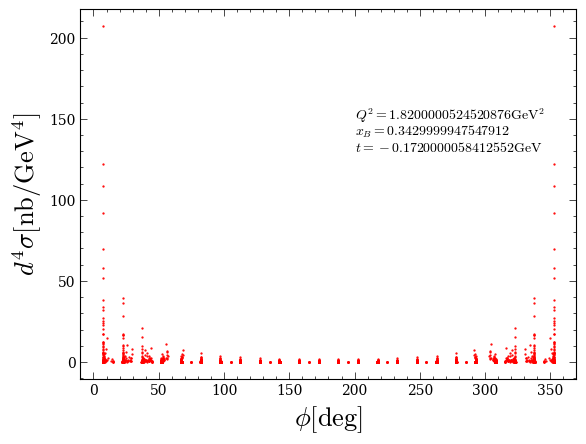

In [158]:
# Load the data from the CSV file
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams["font.family"] = "serif"

plt.rcParams["mathtext.fontset"] = "cm" # https://matplotlib.org/stable/gallery/text_labels_and_annotations/mathtext_fontfamily_example.html


# These slightly-modified styles come from: https://github.com/garrettj403/SciencePlots/blob/master/scienceplots/styles/science.mplstyle
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True

# Set y axis
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.right'] = True

# Extract x and y values from the DataFrame
x = jlab_pandas_df['phi_x']
y = jlab_pandas_df['F']

fixed_kinematics_Q_squared = jlab_pandas_df['QQ'][0]
fixed_kinematics_x_Bjorken = jlab_pandas_df['x_b'][0]
fixed_kinematics_t = jlab_pandas_df['t'][0]


# https://stackoverflow.com/a/33788258 -> HOW TO FORMAT WITH LATEX STRING
annotation_Q_squared = r"$Q^{{2}} = {} \text{{GeV}}^{{2}}$".format(fixed_kinematics_Q_squared)
annotation_x_Bjorken = r"$x_{{B}} = {} $".format(fixed_kinematics_x_Bjorken)
annotation_t = r"$t = {} \text{{GeV}} $".format(fixed_kinematics_t)

# Plot the data using Matplotlib
plt.scatter(x, y, color = 'red', s = 0.4)

plt.xlabel(r"$\phi [\text{deg}]$", fontsize = 19)
plt.ylabel(r"$d^{4} \sigma [\text{nb}/\text{GeV}^{{4}}]$", fontsize = 19)
plt.annotate(
    annotation_Q_squared,
    (200,150)
)
plt.annotate(
    annotation_x_Bjorken,
    (200,140)
)
plt.annotate(
    annotation_t,
    (200,130)
)
plt.show()

> Received mp (mass of proton): 0.93827208816
> Received xB (Bjorken x): 0.3429999947547912
> Received Q  (square-root momentum transfer): 1.3490737757632412
> Calculated epsilon to be: 0.47710855714376704
> Received mp (mass of proton): 0.93827208816
> Received xB (Bjorken x): 0.3429999947547912
> Received Q  (momentum transfer): 1.8200000524520876
> Calculated epsilon squared to be: 0.22763257529980727
> Calculated y to be: 0.4917571121010006
> Received Q (momentum transfer): 1.8200000524520876
> Received x_B (Bjorken x) 0.3429999947547912
> Received t (hadronic momentum change): -0.1720000058412552
> Calculated generalized Bjorken to be: 0.20115437410625223
> Received mass of proton: 0.93827208816
> Received xi (skewness): 0.20115437410625223
> Calculated the minimum value of t to be: -0.14849603520274093
> Calculated k_squared to be: 0.004625289320229331
> Calculated k dot delta: 0       -7.677352
1       13.470129
2      -18.660842
3        9.010698
4       -0.901800
          ...

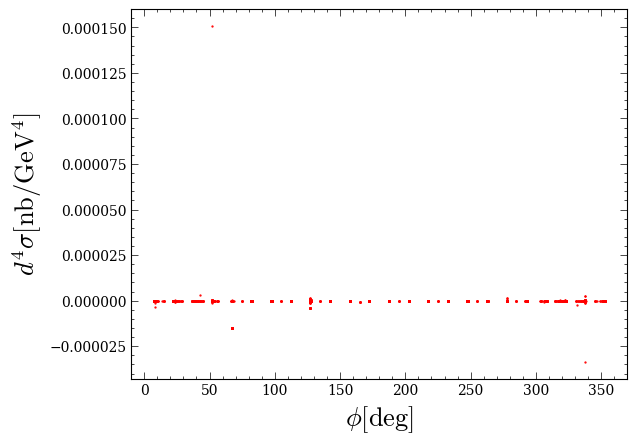

In [172]:
# Load the data from the CSV file
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams["font.family"] = "serif"

plt.rcParams["mathtext.fontset"] = "cm" # https://matplotlib.org/stable/gallery/text_labels_and_annotations/mathtext_fontfamily_example.html


# These slightly-modified styles come from: https://github.com/garrettj403/SciencePlots/blob/master/scienceplots/styles/science.mplstyle
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True

# Set y axis
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.right'] = True

# Extract x and y values from the DataFrame
x = jlab_pandas_df['phi_x']

y = calculate_bethe_heitler_amplitude_squared(
    jlab_pandas_df['k'][0],
    jlab_pandas_df['QQ'][0],
    jlab_pandas_df['x_b'][0],
    jlab_pandas_df['t'][0],
    jlab_pandas_df['phi_x'],
    True
)

fixed_kinematics_Q_squared = jlab_pandas_df['QQ'][0]
fixed_kinematics_x_Bjorken = jlab_pandas_df['x_b'][0]
fixed_kinematics_t = jlab_pandas_df['t'][0]


# https://stackoverflow.com/a/33788258 -> HOW TO FORMAT WITH LATEX STRING
annotation_Q_squared = r"$Q^{{2}} = {} \text{{GeV}}^{{2}}$".format(fixed_kinematics_Q_squared)
annotation_x_Bjorken = r"$x_{{B}} = {} $".format(fixed_kinematics_x_Bjorken)
annotation_t = r"$t = {} \text{{GeV}} $".format(fixed_kinematics_t)

# Plot the data using Matplotlib
plt.scatter(x, y, color = 'red', s = 0.4)

plt.xlabel(r"$\phi [\text{deg}]$", fontsize = 19)
plt.ylabel(r"$d^{4} \sigma [\text{nb}/\text{GeV}^{{4}}]$", fontsize = 19)
plt.annotate(
    annotation_Q_squared,
    (200,150)
)
plt.annotate(
    annotation_x_Bjorken,
    (200,140)
)
plt.annotate(
    annotation_t,
    (200,130)
)
plt.show()

In [6]:
print(jlab_pandas_df['k'][0],
    jlab_pandas_df['QQ'][0],
    jlab_pandas_df['x_b'][0],
    jlab_pandas_df['t'][0])

5.75 1.8200000524520876 0.3429999947547912 -0.1720000058412552
